Names of Members of the group
1.  Adenike Bello
2.  Maryam Habib
3.  Sharon Alawode
4.  Faith Arayi
5.  Khadijah Adebayo
6.  Yvette Wambi          
7.  Betty Igbukan
8.
9.

# Importing Libaries and mounting our drive #

In [65]:
#starting with diabetes dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and cleaning of the dataset #

In [10]:
# Read the data set
CV= pd.read_csv("/content/drive/MyDrive/Tech4Dev /train.csv")
CV

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [11]:
# View the first 5 rows of the data set
CV.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [12]:
# Read te last 5 rows of the data set
CV.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [13]:
# checkiing number of entries (rows and columns, the column names and their data types, count of non-null values in each column.
CV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [14]:
# Descriptive statistics on the columns with numbers
CV.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
# checking number of rows and columns
CV.shape

(3390, 17)

In [16]:
# Checking for number of duplicates
CV.duplicated().sum()

0

In [17]:
# Calling column names as they appear in the data set
CV.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [18]:
# checking for null values
CV.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [19]:
# Mean value of the "education" column
md = CV["education"].mean()
md

1.9709355131698456

In [20]:
# filling up all null values in education column
CV["education"].fillna(md, inplace = True)
CV["education"]

0       2.0
1       4.0
2       1.0
3       1.0
4       1.0
       ... 
3385    1.0
3386    1.0
3387    3.0
3388    1.0
3389    3.0
Name: education, Length: 3390, dtype: float64

In [21]:
# Mean value of the "cigsPerDay" column
mn= CV["cigsPerDay"].mean()
mn

9.069477434679335

In [22]:
# filling up all null values in cigsperday column
CV["cigsPerDay"].fillna(mn, inplace = True)
CV["cigsPerDay"]

0        3.0
1        0.0
2       10.0
3       20.0
4       30.0
        ... 
3385     0.0
3386     0.0
3387     3.0
3388     0.0
3389     0.0
Name: cigsPerDay, Length: 3390, dtype: float64

In [23]:
# Mean value of the "BPMeds" column
ma = CV["BPMeds"].mean()
ma

0.029886431560071727

In [24]:
# Median value of the "BPMeds" column
mc = CV["BPMeds"].median()
mc

0.0

In [25]:
# Filling up null values in the BPMeds column
CV["BPMeds"].fillna(mc, inplace = True)
CV["BPMeds"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3385    0.0
3386    0.0
3387    0.0
3388    0.0
3389    0.0
Name: BPMeds, Length: 3390, dtype: float64

In [26]:
# Mean value of the "totChol" column
tt=CV["totChol"].mean()
tt

237.07428400954655

In [27]:
# Filling up null values in the "totChol" column
CV["totChol"].fillna(tt, inplace = True)
CV["totChol"]

0       221.0
1       212.0
2       250.0
3       233.0
4       241.0
        ...  
3385    261.0
3386    199.0
3387    352.0
3388    191.0
3389    288.0
Name: totChol, Length: 3390, dtype: float64

In [28]:
# Mean value of the "BMI" column
b = CV["BMI"].mean()
b

25.7949644549763

In [29]:
# Filling up null values in the "BMI" column
CV["BMI"].fillna(b, inplace = True)
CV["BMI"]

0       25.794964
1       29.770000
2       20.350000
3       28.260000
4       26.420000
          ...    
3385    29.280000
3386    21.960000
3387    28.920000
3388    23.010000
3389    29.880000
Name: BMI, Length: 3390, dtype: float64

In [30]:
# Mean value of the "heartRate" column
CV["heartRate"].mean()

75.97727943346119

In [31]:
# Filling up null values in the "heartRate" column
CV["heartRate"].fillna(75.98, inplace = True)
CV["heartRate"]

0       90.0
1       72.0
2       88.0
3       68.0
4       70.0
        ... 
3385    70.0
3386    80.0
3387    73.0
3388    80.0
3389    79.0
Name: heartRate, Length: 3390, dtype: float64

In [32]:
# Mean value of the "glucose" column
CV["glucose"].mean()

82.08651976668827

In [33]:
# filling all null values in glucose column
CV["glucose"].fillna(82.08651976668827, inplace = True)
CV["glucose"]

0        80.0
1        75.0
2        94.0
3        94.0
4        77.0
        ...  
3385    103.0
3386     84.0
3387     72.0
3388     85.0
3389     92.0
Name: glucose, Length: 3390, dtype: float64

In [34]:
# Displaying the first 10 rows
CV.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.00000,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.00000,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.00000,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.00000,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.00000,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.800000,85.0,65.00000,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.830000,75.0,79.00000,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.150000,60.0,63.00000,0
8,8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.700000,86.0,79.00000,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.710000,85.0,82.08652,0


In [35]:
#checking for null values again
CV.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **We can see form the above that we no longer have nul values in our data set**

# Exploratory Data Analysis (EDA) #

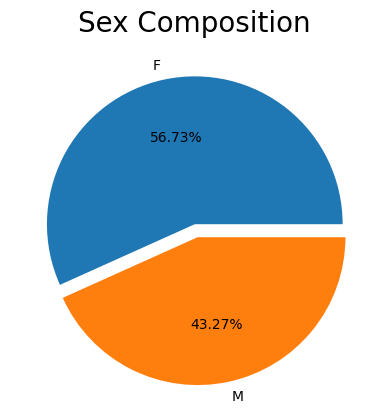

In [36]:
# Plotting a pie chart to check the sex composition
plt.figure("Figsize = (6,6)")
plt.pie(x = CV["sex"].value_counts(), labels=["F", "M"], autopct = "%.2f%%", explode = (0,0.09))
plt.title("Sex Composition", fontdict = {"fontsize":20})
plt.show()

**This data set contains more female respondents with a cummulative of 56.73% while the male respondents are the remaining 43.27%**

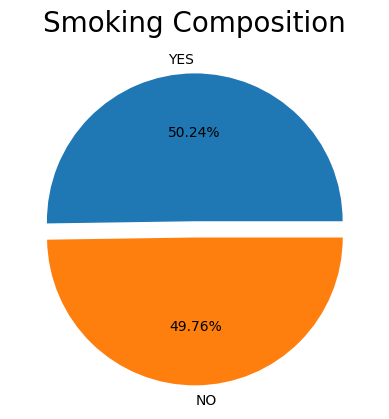

In [37]:
# Plotting a pie chart to check the smoking composition
plt.figure("Figsize = (6,6)")
plt.pie(x = CV["is_smoking"].value_counts(), labels=["YES", "NO"], autopct = "%.2f%%", explode = (0.02,0.09))
plt.title("Smoking Composition", fontdict = {"fontsize":20})
plt.show()

**A little over 50.24% of the respondents are smokers while the remaining 49.76% are non-smokers**


<Axes: xlabel='sex', ylabel='count'>

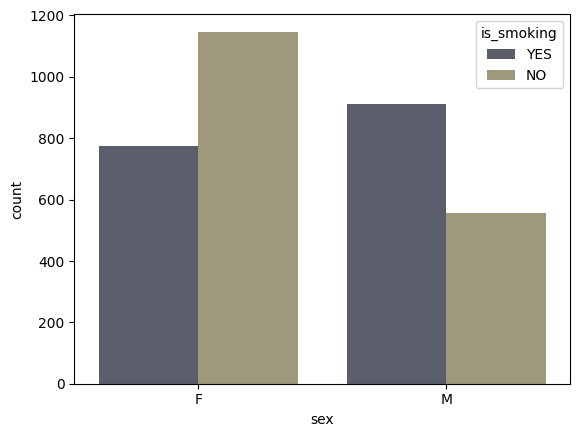

In [38]:
# Plottinng a countplot to check the relationship between sex and is smoking
sns.countplot( data= CV, x = "sex", hue = "is_smoking", palette = "cividis")

**The bar chart above shows that more males are smokers unlike their female counterparts. It also shows that there is a huge gap between the female non-smokers and male non-smokers with females leading the chart.**

In [39]:
CV.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


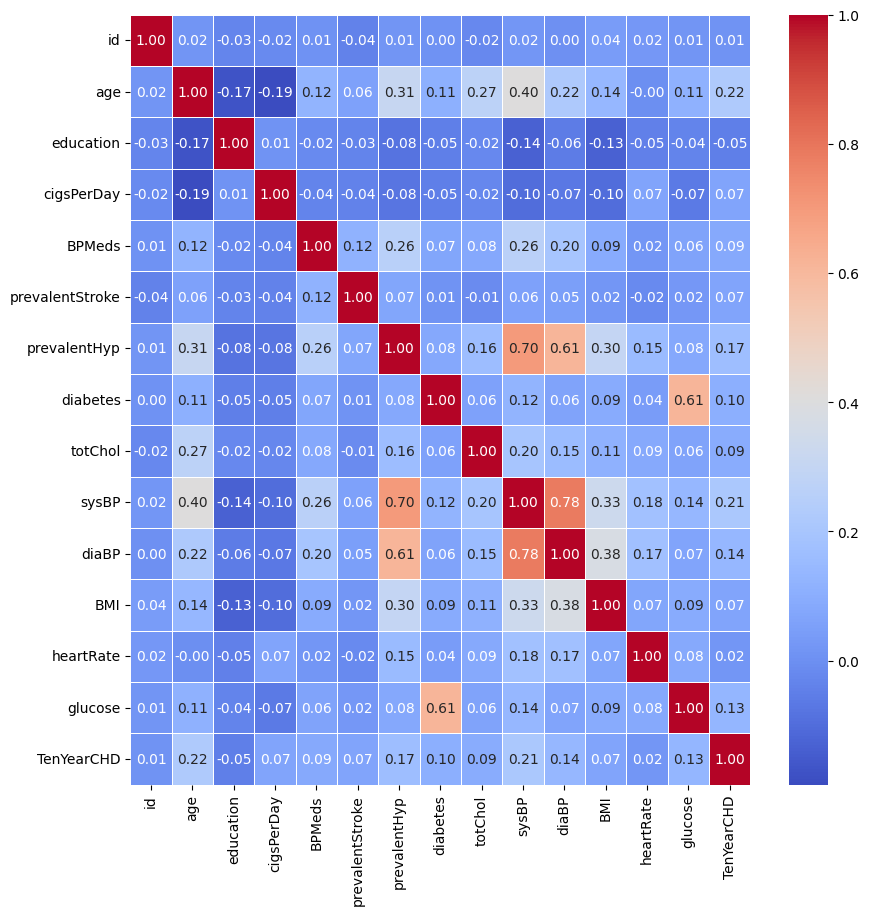

In [40]:
# plotting correlation map for all all variables
correlation_matrix = CV.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.show()

**The heat map shows the correlation that exists between the 17 variables. We used this heatmap to determine which of the independent variables to be used for our logical regression prediction.**

***We concluded that age, Systolic Blood pressure, Diastolic blood pressure, prevalent hyertension, and glucose levels will be our independent variables while TenYearCHD will be our dependent variable ***

# Training and Testing the Dataset #

Independent variables are: age, prevalentHyp, sysBP,diaBP, glucose.
Dependent Variables is : TenYearCHD'

Tranning and testing of dataset: Tranning = 70 and Testing = 30

In [43]:
# Select and target variable
x = CV[['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose' ]]
x

,age,prevalentHyp,sysBP,diaBP,glucose
0,64,0,148.0,85.0,80.0
1,36,1,168.0,98.0,75.0
2,46,0,116.0,71.0,94.0
3,50,1,158.0,88.0,94.0
4,64,0,136.5,85.0,77.0
...,...,...,...,...,...
3385,60,0,123.5,79.0,103.0
3386,46,0,102.0,56.0,84.0
3387,44,1,164.0,119.0,72.0
3388,60,1,167.0,105.0,85.0


In [45]:
y = CV['TenYearCHD']
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [46]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [48]:
X_train

,age,prevalentHyp,sysBP,diaBP,glucose
1074,56,1,165.0,115.0,116.00000
1025,47,0,116.0,82.0,87.00000
2697,63,0,117.5,75.0,91.00000
1821,34,0,108.0,66.0,88.00000
2634,45,0,107.5,64.5,82.08652
...,...,...,...,...,...
2646,50,0,127.5,85.0,69.00000
2642,32,0,111.0,70.0,88.00000
391,44,0,128.0,81.5,87.00000
198,45,0,135.0,85.0,84.00000


In [49]:
 X_test

,age,prevalentHyp,sysBP,diaBP,glucose
3063,59,0,135.0,77.5,170.0
730,61,0,124.0,74.0,75.0
2324,38,0,95.0,65.0,77.0
3335,64,0,135.0,74.0,83.0
2041,39,0,122.0,72.0,75.0
...,...,...,...,...,...
1640,51,0,125.0,84.0,76.0
600,50,0,122.0,81.5,76.0
2979,37,0,115.0,76.0,80.0
2832,63,0,135.0,82.0,56.0


In [50]:
 y_train

1074    0
1025    0
2697    0
1821    0
2634    0
       ..
2646    0
2642    0
391     0
198     0
2911    0
Name: TenYearCHD, Length: 2373, dtype: int64

In [51]:
y_test

3063    0
730     0
2324    0
3335    0
2041    0
       ..
1640    0
600     0
2979    0
2832    0
245     0
Name: TenYearCHD, Length: 1017, dtype: int64

In [52]:
X_train, X_test, y_train, y_test

(      age  prevalentHyp  sysBP  diaBP    glucose
 1074   56             1  165.0  115.0  116.00000
 1025   47             0  116.0   82.0   87.00000
 2697   63             0  117.5   75.0   91.00000
 1821   34             0  108.0   66.0   88.00000
 2634   45             0  107.5   64.5   82.08652
 ...   ...           ...    ...    ...        ...
 2646   50             0  127.5   85.0   69.00000
 2642   32             0  111.0   70.0   88.00000
 391    44             0  128.0   81.5   87.00000
 198    45             0  135.0   85.0   84.00000
 2911   39             0  115.0   75.0   82.08652
 
 [2373 rows x 5 columns],
       age  prevalentHyp  sysBP  diaBP  glucose
 3063   59             0  135.0   77.5    170.0
 730    61             0  124.0   74.0     75.0
 2324   38             0   95.0   65.0     77.0
 3335   64             0  135.0   74.0     83.0
 2041   39             0  122.0   72.0     75.0
 ...   ...           ...    ...    ...      ...
 1640   51             0  125.0   84

In [53]:
len(X_test)

1017

In [54]:
len(y_test)

1017

In [55]:
# Initialize logistic regression model
model = LogisticRegression()
model

LogisticRegression()

In [56]:
# fitting the x and y variables to LR model
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# predicting the x variables
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# checking the accuracy of the model
model.score(X_test, y_test)

0.8662733529990168

The accuracy of the model is 0.86.

In [71]:
# predicting CHD status for these parameters: age= 61,	prevalentHyp = 1,	Systolic Blood pressure = 153.7,	Diastolic blood pressure = 92.0,	glucose = 85.0
model.predict([[61,1,153.7,92.0,85.0]])

array([0])

In [72]:
# predicting CHD status for these parameters: age= 25,	prevalentHyp = 0,	Systolic Blood pressure = 147.3,	Diastolic blood pressure = 72.9,	glucose = 95.7
model.predict([[25, 0, 147.3, 72.9, 95.7]])

array([0])

In [76]:
# predicting CHD status for these parameters: age= 80,	prevalentHyp = 1,	Systolic Blood pressure = 250,	Diastolic blood pressure = 45,	glucose = 85
model.predict([[80, 1, 250, 45, 85]])

array([1])

With our predictions output above, it can be proven that the higher the age at systolic blood pressure, the more they are likely to contact the  Coronary heart disease in the next ten years.